# 0. ***Introduction***

Using Machine Learning we'll be doing a multi-class classification for music track genre to indentify songs that fall under the rock genre.

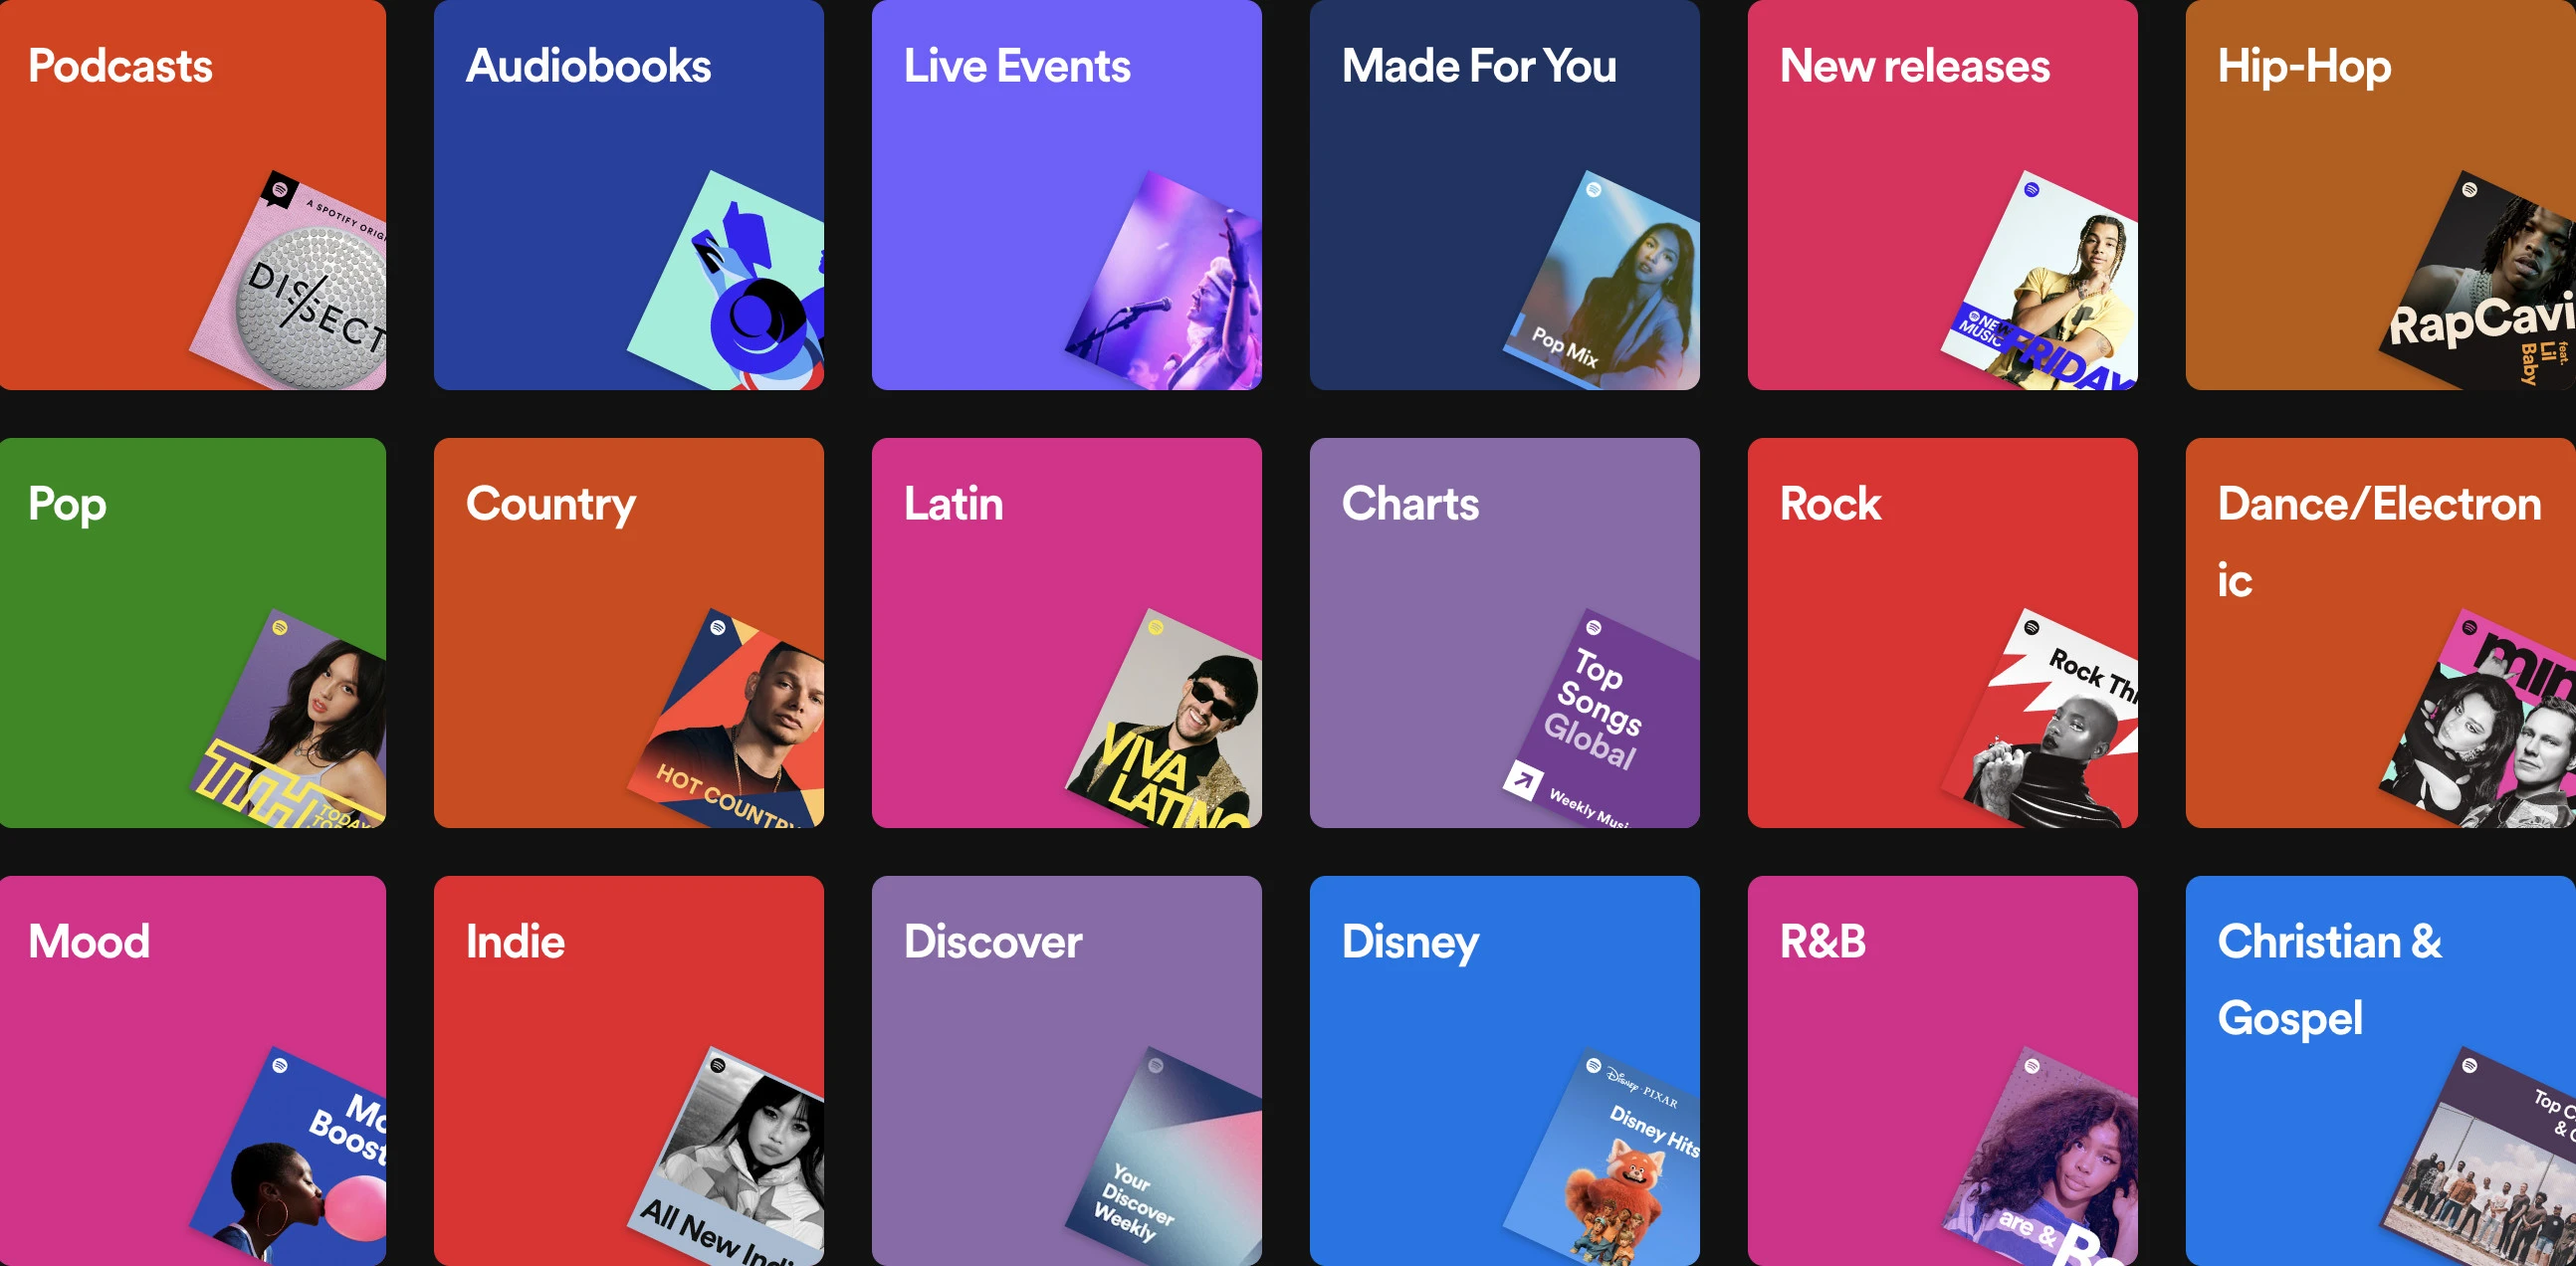

In [1]:
#Importing our packages and models
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.ticker import PercentFormatter, FuncFormatter
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

# 1. ***Data Overview***

### **Spotify Song Dataset**:

>Comprised of 114k songs from Spotify with genre categories for each song

In [2]:
#Importing our dataset
spotify = pd.read_csv('/kaggle/input/spotify-dataset-114k-songs/dataset.csv', 
                      usecols=range(1, len(pd.read_csv('/kaggle/input/spotify-dataset-114k-songs/dataset.csv', nrows=1).columns)))

#Displaying our dataset
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
#Droping duplicates
spotify.drop_duplicates(inplace=True)

#Dropping the 1 row with missing values
spotify.dropna(inplace=True)

In [4]:
#Showing Dataframe shape
spotify.shape

(113549, 20)

In [5]:
#Displaying information
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [6]:
#Checking summary statistics
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
#Checking for missing values
missing_values = spotify.isna().sum()
print("Amount of missing values per column:")
missing_values

Amount of missing values per column:


track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# 2. ***Exploratory Analysis***

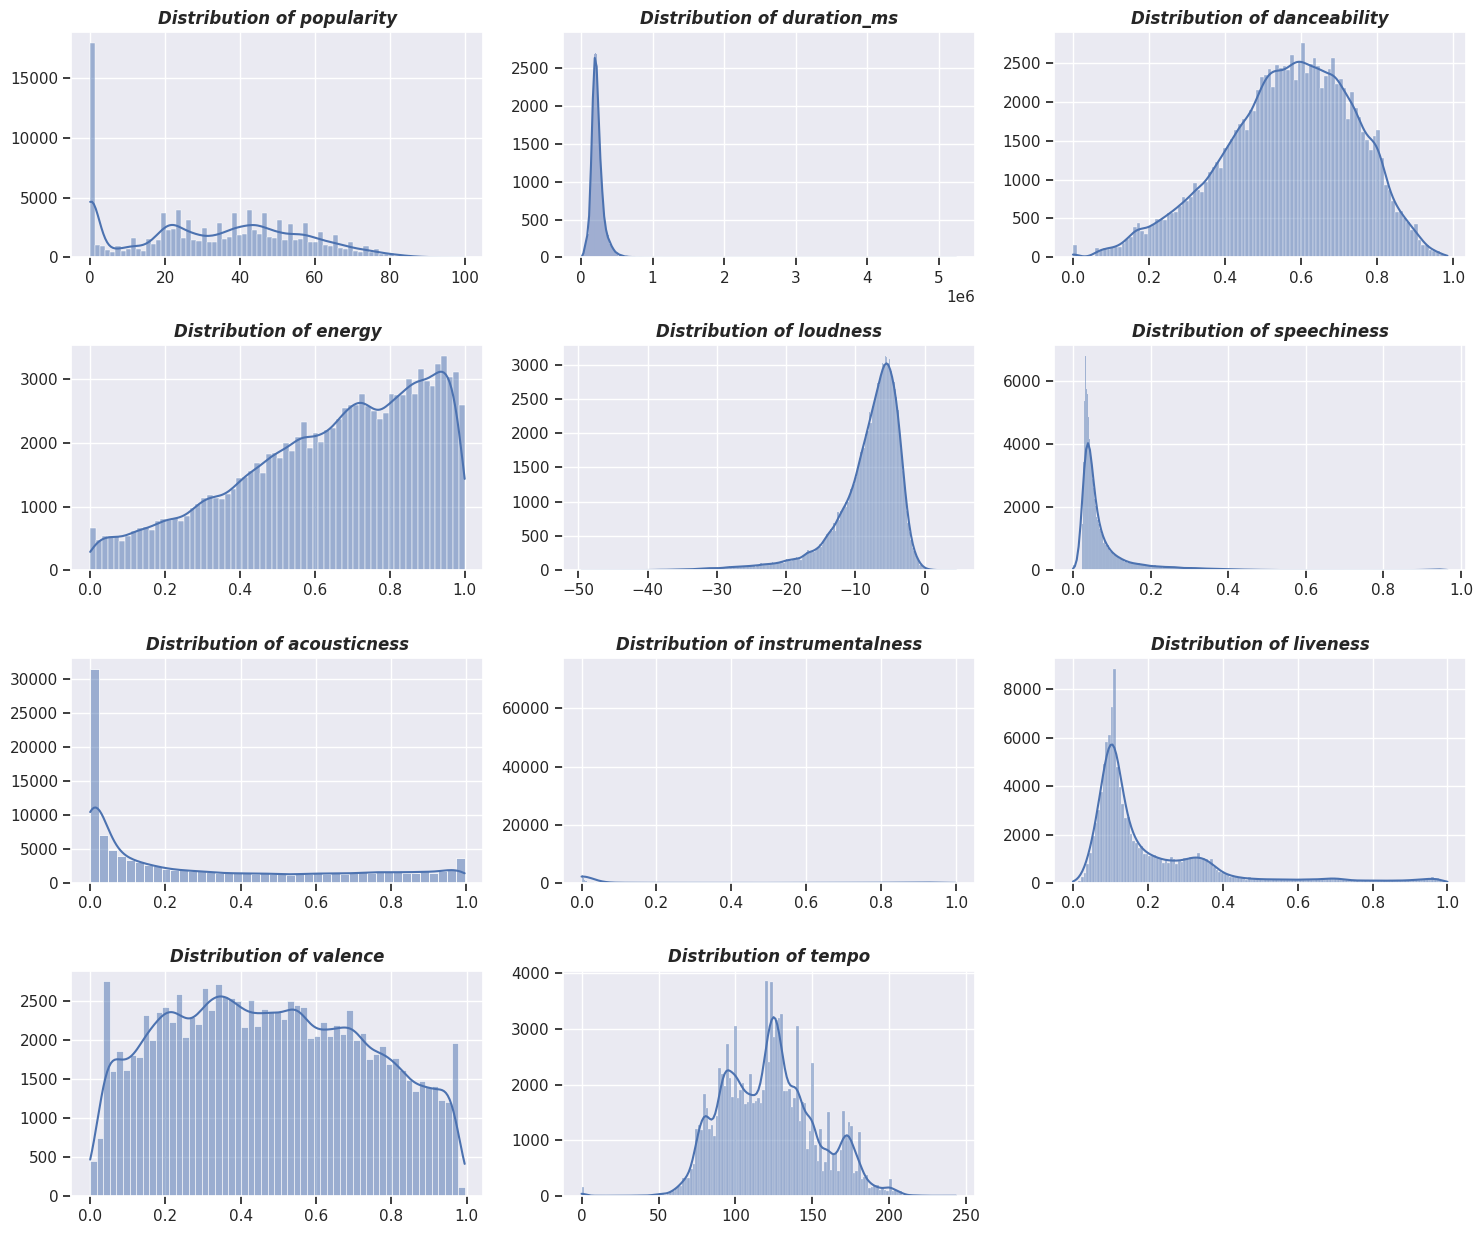

In [8]:
#Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Filtering features to only include numeric ones
numeric_features = ['popularity', 'duration_ms', 'danceability', 'energy', 
                    'loudness', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo']

#Histograms of numeric features
sns.set(rc={"figure.figsize":(15, 12.5)})
sns.color_palette("tab10")

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(spotify[feature], kde=True, color='b')
    plt.title(f'Distribution of {feature}', fontweight='bold', fontstyle='oblique')
    plt.xlabel('')
    plt.ylabel('')
    plt.tick_params(bottom=True, left=True)

plt.tight_layout()
plt.show()

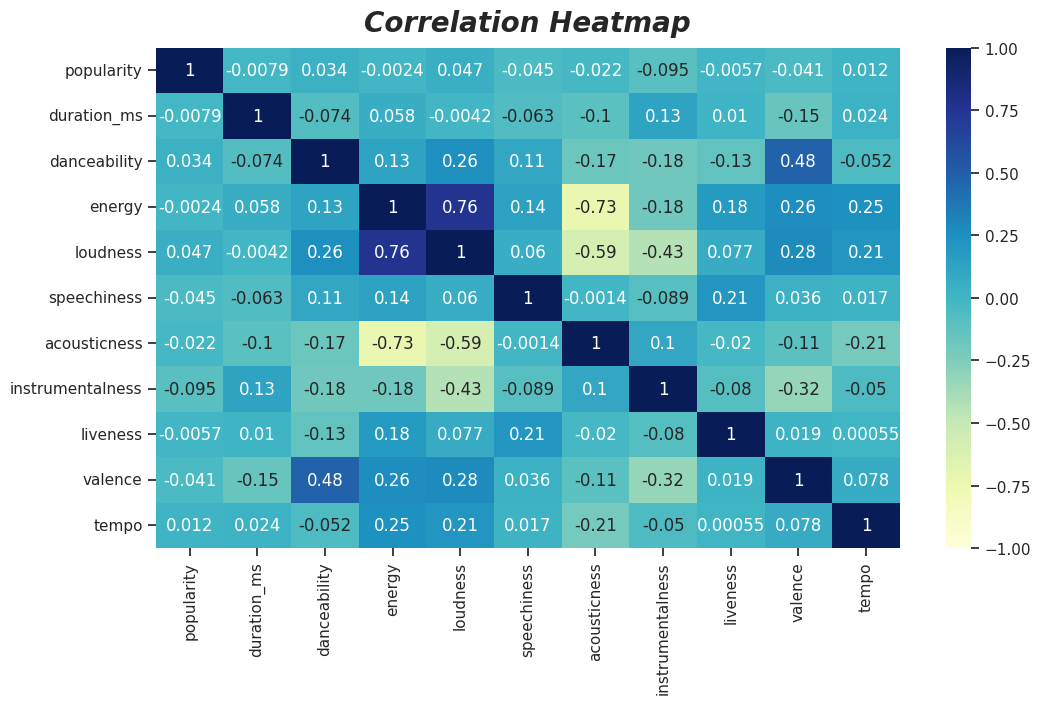

In [9]:
#Sorting out numerical features
numeric_features = ['popularity', 'duration_ms', 'danceability', 'energy', 
                    'loudness', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo']
numeric_features_df = spotify[numeric_features]


#Display our correaltion matrix
plt.figure(figsize=(12, 6.5))
heatmap = sns.heatmap(numeric_features_df.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, fontstyle='oblique', fontweight='bold', pad=12)
heatmap.tick_params(bottom=True, left=True)

In [10]:
#Unique track genre count
genres = spotify['track_genre'].nunique()
print(f"{genres} unique song genres: (1000 entries for each track genre)\n")

#Count per track genre
genre_counts = spotify['track_genre'].value_counts()
genre_counts

114 unique song genres: (1000 entries for each track genre)



track_genre
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
               ... 
honky-tonk      981
dance           965
german          963
classical       933
romance         904
Name: count, Length: 114, dtype: int64

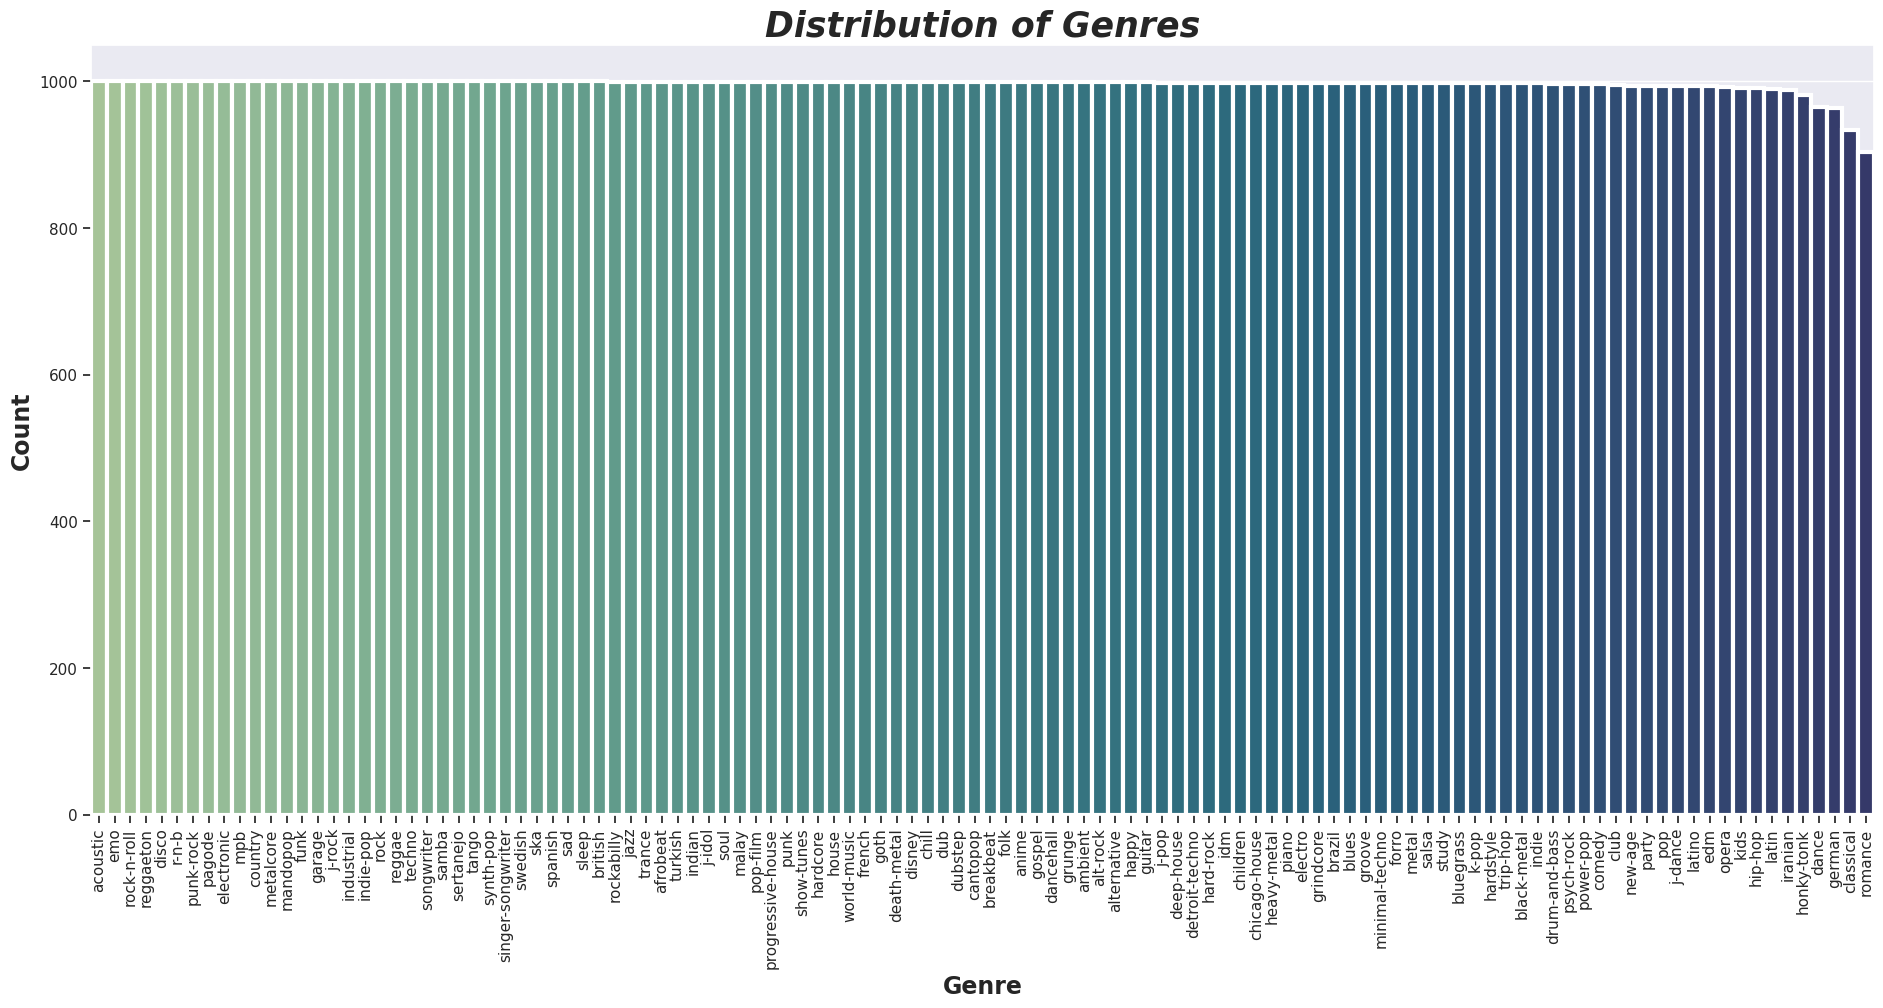

In [11]:
#Settting Up Plot
sns.set(rc={"figure.figsize":(23, 10)})
sns.color_palette("tab10")
sns.set_style("darkgrid")

#Visually showing value count for each genre 
sns.countplot(data=spotify, x='track_genre', order=spotify['track_genre'].value_counts().index, 
              palette='crest', width = 1, edgecolor = 'white', linewidth=3)
plt.title('Distribution of Genres', fontweight='bold', fontstyle='oblique', fontsize=25)
plt.xlabel('Genre', fontweight='bold', fontsize=17)
plt.ylabel('Count', fontweight='bold',  fontsize=17)
plt.xticks(rotation=90)
plt.tick_params(bottom=True, left=True)
plt.show()

In [12]:
groupby = spotify.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).reset_index()
groupby['popularity'] = round(groupby['popularity'], 2)

print('Top 10 Most Popular Genres (By Average Popularity):')
groupby.head(10)

Top 10 Most Popular Genres (By Average Popularity):


,track_genre,popularity
0,pop-film,59.28
1,k-pop,56.96
2,chill,53.70
3,sad,52.38
4,grunge,49.58
5,indian,49.53
6,anime,48.77
7,emo,48.13
8,pop,47.90
9,sertanejo,47.87


In [13]:
print('Top 10 Least Popular Genres (By Average Popularity):')
groupby.tail(10).sort_values(by='popularity', ascending=True)

Top 10 Least Popular Genres (By Average Popularity):


,track_genre,popularity
113,iranian,2.22
112,romance,3.55
111,latin,8.36
110,detroit-techno,11.18
109,chicago-house,12.33
108,classical,13.52
107,jazz,13.59
106,grindcore,14.63
105,kids,14.94
104,idm,15.76


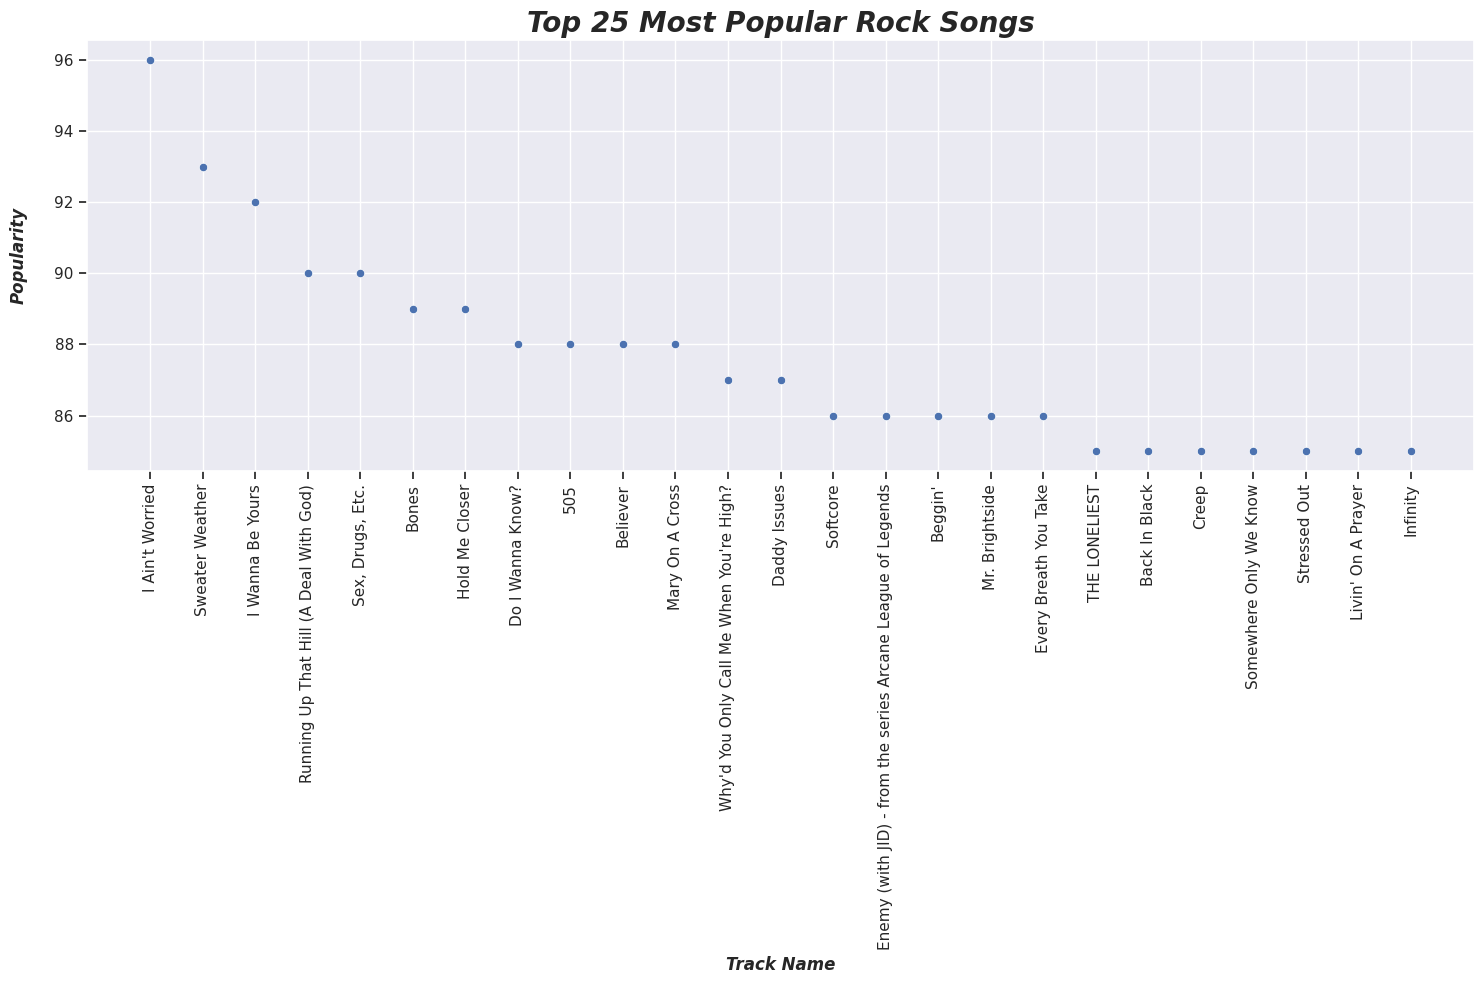

In [14]:
#First 50 most popular rock songs
spotify_rock = spotify[spotify['track_genre'] == 'rock']

top_100_rock = spotify_rock.sort_values(by="popularity",ascending=False).head(25)
plt.figure(figsize=(15, 10))



#Plotting top 25 rock track scatterplot
sns.scatterplot(top_100_rock, x="track_name", y="popularity")
plt.title("Top 25 Most Popular Rock Songs", fontweight='bold', fontstyle='oblique', fontsize=20)
plt.ylabel("Popularity\n", fontweight='bold', fontstyle='oblique')
plt.xlabel("Track Name", fontweight='bold', fontstyle='oblique')
plt.xticks(rotation=90)
plt.tick_params(bottom=True, left=True)

plt.tight_layout()
plt.show()

In [15]:
#Displaying top 25 rock track table
top_100_rock[['artists', 'album_name', 'track_name', 'popularity']]

,artists,album_name,track_name,popularity
91003,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96
91002,The Neighbourhood,I Love You.,Sweater Weather,93
91001,Arctic Monkeys,AM,I Wanna Be Yours,92
91009,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90
91000,Beach Weather,Chit Chat,"Sex, Drugs, Etc.",90
91012,Imagine Dragons,Bones,Bones,89
91254,Elton John;Britney Spears,Hold Me Closer,Hold Me Closer,89
91101,Arctic Monkeys,AM,Do I Wanna Know?,88
91102,Arctic Monkeys,Favourite Worst Nightmare,505,88
91011,Imagine Dragons,Evolve,Believer,88


# 3. ***Data Preprocessing***

In [16]:
#Dropping unnessary columns (also drops rows with missing values)
spotify.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace=True)


#Convert columns with Boolean values into integers
spotify['explicit'] = spotify['explicit'].map({True: 1, False: 0})


#spotify = spotify[spotify['track_genre'] == 'rock']
spotify['track_genre_encoded'] = spotify['track_genre'].apply(lambda x: 1 if x == 'rock' else 0)


#Setting up features for better model analysis
#spotify = pd.get_dummies(spotify, columns=['key', 'mode', 'time_signature'], drop_first=True)
#spotify[['key', 'mode', 'time_signature']] = spotify[['key', 'mode', 'time_signature']].map({True: 1, False: 0})

#Enumaring our Label column 'track_genre' (Convert from  categorical values into integers)
#label_encoder = LabelEncoder()
#spotify['track_genre_encoded'] = label_encoder.fit_transform(spotify['track_genre'])


#Dropping our original 'track_genre' column as we dont need it anymore
spotify.drop('track_genre', axis=1, inplace=True)

#Displaying new dataset
print(spotify['track_genre_encoded'].unique())
spotify

[0 1]


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


In [17]:
#Features & Labels
X = spotify.iloc[:, :-1].values
y = spotify.iloc[:, -1].values

#Splitting dataset set into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Displaying our new dataset for model training
print("Features Data Size: {}".format(X_train.shape))

#Dataframe of features
X_train_df = pd.DataFrame(X_train)
X_train_df

Features Data Size: (85161, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.094064,-0.786560,-0.306931,0.550725,-1.064589,0.474561,-0.207420,0.754479,-0.109663,-0.840895,2.330361,-0.449623,0.329129,-0.872662,0.220442
1,-1.498345,-0.110666,-0.306931,-0.199487,-0.861347,1.036188,-0.255754,-1.325418,-0.520789,0.440717,-0.503715,-0.596432,-1.242668,-0.630314,-2.101518
2,0.298460,-0.019608,-0.306931,1.860712,-0.395084,1.597815,-0.545560,-1.325418,0.091666,-0.626288,0.010102,-0.743766,-0.732896,-0.341465,0.220442
3,-1.049144,-0.591828,-0.306931,-0.476489,-1.335580,-1.491133,-0.735702,0.754479,-0.495388,1.329889,-0.503703,-0.281841,1.028135,1.650992,0.220442
4,0.702741,-0.450189,-0.306931,-2.461668,-0.438921,-0.929506,-1.714371,-1.325418,-0.310993,1.302761,2.669675,3.435579,-1.829640,-0.609899,0.220442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85156,0.792581,3.936520,-0.306931,-0.297592,0.517515,0.193748,0.521389,-1.325418,-0.415421,0.401533,-0.503715,1.778732,0.379334,1.263803,0.220442
85157,0.702741,0.048936,-0.306931,-0.066757,0.848282,0.193748,-0.134120,0.754479,-0.148236,-0.904494,0.540078,-0.061627,-1.623453,0.060936,0.220442
85158,0.433220,-0.156312,-0.306931,0.192932,-0.422980,-1.491133,0.378583,0.754479,-0.426710,0.787343,-0.503715,-0.234652,-0.481872,0.506770,-2.101518
85159,0.478140,-0.106773,-0.306931,-0.845825,-2.132609,0.193748,-1.387415,0.754479,-0.485039,1.911618,-0.503715,-0.658826,-1.373973,-0.598591,0.220442


In [19]:
#Displaying our new dataset for model training
print("Labels Data Size: {}".format(y_train.shape))

#Dataframe of features
y_train_df = pd.DataFrame(y_train)
y_train_df

Labels Data Size: (85161,)


,0
0,0
1,0
2,0
3,0
4,0
...,...
85156,0
85157,0
85158,0
85159,0


# 4. ***Multi-Model Evalutation***

### *Training and Performance Metrics w/ Default Parameters*

In [20]:
####################################### MULTI-MODEL PERFORMANCE ##################################
from sklearn.model_selection import cross_validate

#Creating a dictionary of the models we'll be using
class_models = {"Random Forest Classifier": RandomForestClassifier(),
                "K-nearest neighbors": KNeighborsClassifier(),
                "Gradient Boosting Classifier": GradientBoostingClassifier()}

#Train and evaluate each classifier
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for clf_name, clf in class_models.items():
    # Perform cross-validation once for all metrics
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    cv_results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)

    # Calculate mean values for each metric
    accuracy = cv_results['test_accuracy'].mean() * 100
    precision = cv_results['test_precision_weighted'].mean() * 100
    recall = cv_results['test_recall_weighted'].mean() * 100
    f1 = cv_results['test_f1_weighted'].mean() * 100

    # Save results
    results['Model'].append(clf_name)
    results['Accuracy'].append(round(accuracy, 4))
    results['Precision'].append(round(precision, 4))
    results['Recall'].append(round(recall, 4))
    results['F1 Score'].append(round(f1, 4))

#Create a DataFrame to display the results
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Blues')

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Gradient Boosting Classifier,99.112300,98.637000,99.112300,98.768600
K-nearest neighbors,99.086400,98.662300,99.086400,98.797900
Random Forest Classifier,99.004200,98.635600,99.004200,98.784900


From a simple overview of model performance, each of our models are doing a great job; however, lets take a closer look into the acuracy of predicting certain labels.

***Random Forest Classifier***

In [21]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9893969282795547
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28117
           1       0.37      0.15      0.22       271

    accuracy                           0.99     28388
   macro avg       0.68      0.58      0.61     28388
weighted avg       0.99      0.99      0.99     28388



***Gradient Boosting Classifier***

In [22]:
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9904184866845146
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28117
           1       0.48      0.04      0.08       271

    accuracy                           0.99     28388
   macro avg       0.74      0.52      0.54     28388
weighted avg       0.99      0.99      0.99     28388



***K-Nearest Neighbors***

In [23]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9909821051148373
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28117
           1       0.65      0.12      0.20       271

    accuracy                           0.99     28388
   macro avg       0.82      0.56      0.60     28388
weighted avg       0.99      0.99      0.99     28388



K-Nearest Neighbors provides the strongest precision score when predicting values that fall under the "Rock" genre in comparison to the other tested models, so we'll work with this model and improve its precision even more in predicting values that are under the "Rock" label

### *Hyperparameter Tuning*

In [24]:
train_score = []
test_score = []
neighbors = range(1, 11)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, knn.predict(X_train)))
    test_score.append(accuracy_score(y_test, knn.predict(X_test)))

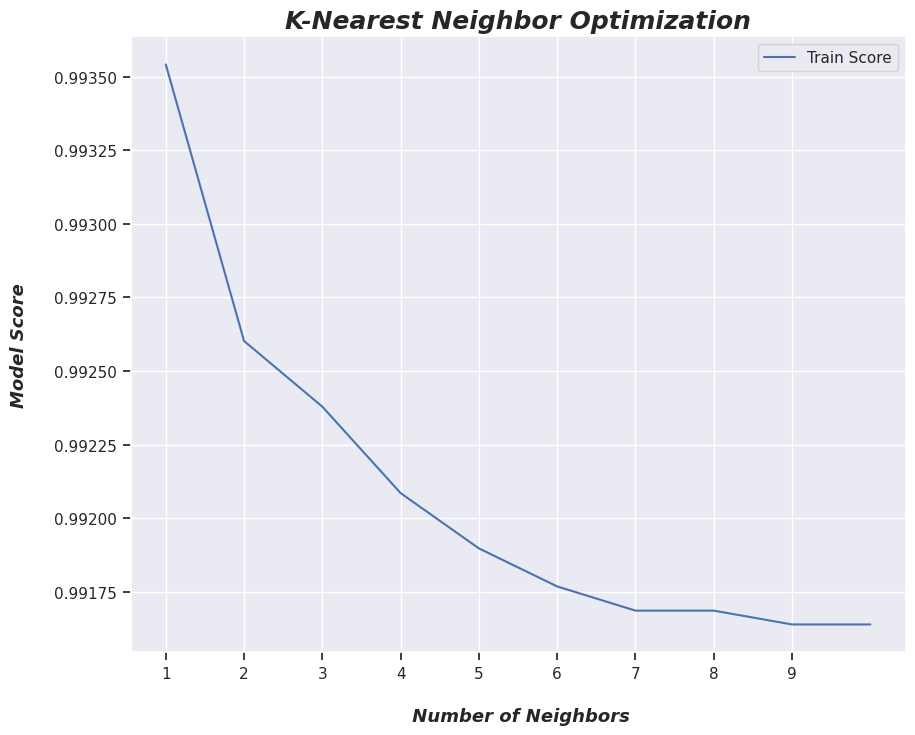

In [25]:
plt.figure(figsize=(10, 8))

plt.plot(neighbors, train_score, label='Train Score')
#plt.plot(neighbors, test_score, label="Test Score")
plt.title('K-Nearest Neighbor Optimization', fontweight='bold', fontstyle='oblique', fontsize=18)
plt.xlabel('\n Number of Neighbors', fontweight='bold', fontstyle='oblique', fontsize=13)
plt.ylabel('Model Score\n', fontweight='bold', fontstyle='oblique', fontsize=13)
plt.tick_params(bottom=True, left=True)
plt.xticks(np.arange(1, 10, 1))
plt.legend()

#print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [26]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("__________________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        
        
        
model_new = KNeighborsClassifier(n_neighbors=4)
model_new.fit(X_train, y_train)


print_score(model_new, X_train, y_train, X_test, y_test, train=True)
print_score(model_new, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.21%
__________________________________________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992219    0.848101  0.992086      0.920160      0.990986
recall         0.999858    0.091907  0.992086      0.545882      0.992086
f1-score       0.996024    0.165842  0.992086      0.580933      0.988917
support    84432.000000  729.000000  0.992086  85161.000000  85161.000000
__________________________________________________________________________
Confusion Matrix: 
 [[84420    12]
 [  662    67]]

Test Result:
Accuracy Score: 99.11%
__________________________________________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.991290    0.827586  0.991123      0.909438      0.989727
recall         0.999822    0.088561  0.991123      0.544192      0.991123
f1-score    